In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-10-17 01:12:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   124MB/s    in 0.8s    

2024-10-17 01:12:42 (124 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

## Inspecting the data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.figure(figsize=(2, 2))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  return img

['63480.jpg']


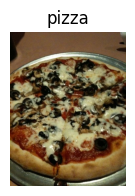

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/', target_class='pizza')

In [ ]:
img.shape

(512, 384, 3)

## Loading and building model of images

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = 'binary',
                                               seed=42
                                               )
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = 'binary',
                                               seed=42
                                               )

# Building a cnn model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_1.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


history_1 = model_1.fit(train_data,
                        epochs=5,
                        validation_data = valid_data
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - accuracy: 0.5821 - loss: 0.6713 - val_accuracy: 0.8420 - val_loss: 0.4001
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.8094 - loss: 0.4420 - val_accuracy: 0.8760 - val_loss: 0.3398
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8125 - loss: 0.4197 - val_accuracy: 0.8760 - val_loss: 0.3120
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.8474 - loss: 0.3708 - val_accuracy: 0.8700 - val_loss: 0.3289
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.8419 - loss: 0.3796 - val_accuracy: 0.8640 - val_loss: 0.3365


<Axes: >

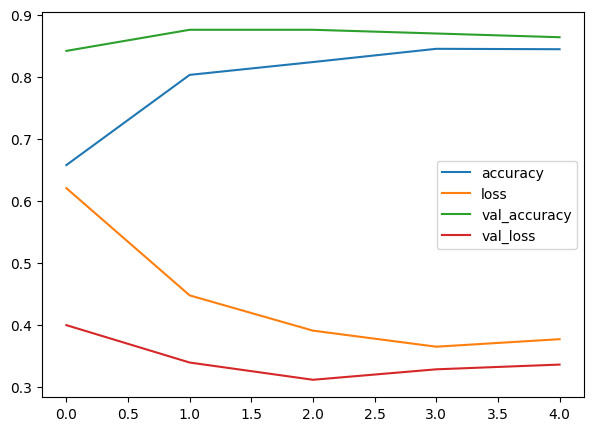

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(7, 5))

In [ ]:
model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 24, 24, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 12, 12, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 10, 10, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,495 (68.34 KB)

 Trainable params: 5,831 (22.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,664 (45.57 KB)

## Data Augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range=0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
train_data_augmented

In [ ]:
# Building a cnn model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_2.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


history_2 = model_2.fit(train_data_augmented,
                        epochs=10,
                        validation_data = valid_data
                        )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 388ms/step - accuracy: 0.5429 - loss: 0.7400 - val_accuracy: 0.7620 - val_loss: 0.5106
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 377ms/step - accuracy: 0.7428 - loss: 0.5397 - val_accuracy: 0.8360 - val_loss: 0.3639
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 398ms/step - accuracy: 0.7690 - loss: 0.5000 - val_accuracy: 0.8320 - val_loss: 0.3810
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 396ms/step - accuracy: 0.7894 - loss: 0.4685 - val_accuracy: 0.8220 - val_loss: 0.4135
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 364ms/step - accuracy: 0.7875 - loss: 0.4661 - val_accuracy: 0.8780 - val_loss: 0.3118
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 421ms/step - accuracy: 0.7951 - loss: 0.4365 - val_accuracy: 0.8600 - val_loss: 0.3240
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 368ms/step - accuracy: 0.8085 - loss: 0.4207 - val_accuracy: 0.8740 - val_loss: 0.2864
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 372ms/step - accuracy: 0.8128 - loss: 0.4202 - val_accu

<Axes: >

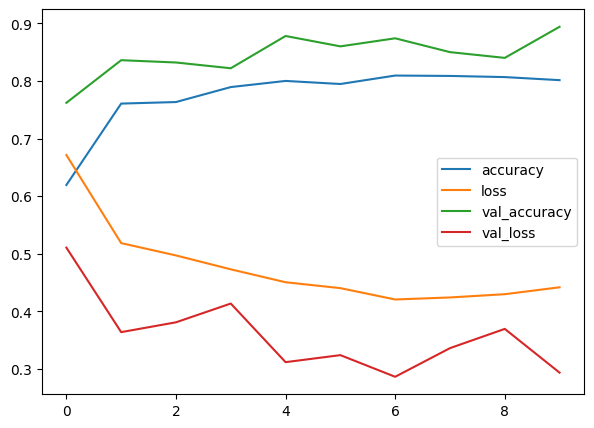

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(7, 5))


In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img


In [ ]:
steak = load_and_prep_image('/content/Cheese-Pizza-Feature.jpg')

In [ ]:
pred = model_2.predict(tf.expand_dims(steak, axis=0))
import pathlib
import numpy  as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.08761942]], dtype=float32)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
prob_class = class_names[int(tf.round(pred))]
prob_class

'pizza'

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>